In [40]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('archive/olist_analyse.csv',low_memory=False)
df

,freq_achat,delais_respecter,seller_in_state,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
0,1,oui,non,SP,111.0,6.0,8.0,5.0,Home and Decor,129.90,12.00,7616.0,1500.0
1,1,oui,non,SP,114.0,3.0,1.0,4.0,Health and Beauty,18.90,8.29,5148.0,375.0
2,1,oui,oui,SC,537.0,26.0,8.0,3.0,Leisure and Entertainment,69.00,17.22,43750.0,1500.0
3,1,oui,oui,PA,321.0,20.0,4.0,4.0,Electronics and Technology,25.99,17.63,1045.0,150.0
4,1,oui,non,SP,288.0,13.0,6.0,5.0,Electronics and Technology,180.00,16.89,528.0,6050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,1,oui,oui,PE,447.0,28.0,10.0,5.0,Health and Beauty,1570.00,497.42,503250.0,60000.0
93354,1,oui,oui,BA,262.0,30.0,1.0,4.0,Health and Beauty,64.89,19.69,32076.0,1720.0
93355,1,oui,non,MT,568.0,15.0,1.0,5.0,Electronics and Technology,89.90,22.56,3315.0,600.0
93356,1,oui,oui,ES,119.0,12.0,5.0,5.0,Leisure and Entertainment,115.00,18.69,4480.0,444.0


In [3]:
num_cols = df._get_numeric_data().columns
print(num_cols)
cols = df.columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)


Index(['freq_achat', 'recence', 'delai_livraison', 'payment_installments',
       'review_score', 'price', 'freight_value', 'produit_volume_cm_cube',
       'product_weight_g'],
      dtype='object')
['seller_in_state', 'delais_respecter', 'customer_state', 'category']



]

In [4]:
numerical_transformer = make_pipeline(
    FunctionTransformer(func=np.abs),
    FunctionTransformer(func=np.log1p),
    StandardScaler()
)

transformations = [
    ('log', numerical_transformer, num_cols),
    # ('log', FunctionTransformer(np.log1p), num_cols),
    # ('standardize', StandardScaler(), num_cols)
]
ct = ColumnTransformer(transformations, remainder='passthrough')

list_col = list(num_cols)+ list(cat_cols)


df_transformed = pd.DataFrame(ct.fit_transform(df), columns=list_col)

In [5]:
df_transformed

,freq_achat,recence,delai_livraison,payment_installments,review_score,price,freight_value,produit_volume_cm_cube,product_weight_g,seller_in_state,delais_respecter,customer_state,category
0,-0.17019,-0.484033,-0.771918,1.75582,0.587521,0.452749,-0.761036,0.006298,0.392843,oui,non,SP,Home and Decor
1,-0.17019,-0.455757,-1.690854,-0.880238,0.042333,-1.611756,-1.369347,-0.293515,-0.630645,oui,non,SP,Health and Beauty
2,-0.17019,1.194742,1.444772,1.75582,-0.624923,-0.233264,-0.149901,1.344752,0.392843,oui,oui,SC,Leisure and Entertainment
3,-0.17019,0.645648,1.032093,0.725661,0.042333,-1.277761,-0.109614,-1.513828,-1.305166,oui,oui,PA,Electronics and Technology
4,-0.17019,0.529984,0.366286,1.315364,0.587521,0.807915,-0.182992,-2.035801,1.423572,oui,non,SP,Electronics and Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,-0.17019,0.998914,1.562114,2.107517,0.587521,3.176286,5.840544,3.214905,3.119755,oui,oui,PE,Health and Beauty
93354,-0.17019,0.429139,1.671626,-0.880238,0.042333,-0.29958,0.080255,1.107114,0.493967,oui,oui,BA,Health and Beauty
93355,-0.17019,1.25467,0.585556,-0.880238,0.587521,0.053076,0.315424,-0.630433,-0.283883,oui,non,MT,Electronics and Technology
93356,-0.17019,-0.41023,0.244595,1.045199,0.587521,0.320308,-0.009431,-0.399907,-0.506075,oui,oui,ES,Leisure and Entertainment


In [6]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   freq_achat              93358 non-null  object
 1   recence                 93358 non-null  object
 2   delai_livraison         93358 non-null  object
 3   payment_installments    93358 non-null  object
 4   review_score            93358 non-null  object
 5   price                   93358 non-null  object
 6   freight_value           93358 non-null  object
 7   produit_volume_cm_cube  93358 non-null  object
 8   product_weight_g        93358 non-null  object
 9   seller_in_state         93358 non-null  object
 10  delais_respecter        93358 non-null  object
 11  customer_state          93358 non-null  object
 12  category                93358 non-null  object
dtypes: object(13)
memory usage: 9.3+ MB


In [7]:
list_to_change =['freq_achat', 'recence', 'delai_livraison', 'payment_installments',
       'review_score', 'price', 'freight_value', 'produit_volume_cm_cube',
       'product_weight_g']

for col in list_to_change:
    df_transformed[col]=df_transformed[col].astype(float)

In [8]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   freq_achat              93358 non-null  float64
 1   recence                 93358 non-null  float64
 2   delai_livraison         93358 non-null  float64
 3   payment_installments    93358 non-null  float64
 4   review_score            93358 non-null  float64
 5   price                   93358 non-null  float64
 6   freight_value           93358 non-null  float64
 7   produit_volume_cm_cube  93358 non-null  float64
 8   product_weight_g        93358 non-null  float64
 9   seller_in_state         93358 non-null  object 
 10  delais_respecter        93358 non-null  object 
 11  customer_state          93358 non-null  object 
 12  category                93358 non-null  object 
dtypes: float64(9), object(4)
memory usage: 9.3+ MB


In [42]:
cat_clo_number = [i for i, c in enumerate(df_transformed.columns) if c in df_transformed[cat_cols].columns]
print(cat_clo_number)

[9, 10, 11, 12]


In [10]:
kpro = KPrototypes(n_clusters=7, init='Huang', random_state=42, max_iter=5, n_init=10, n_jobs=-2, gamma=.25)
clusters = kpro.fit_predict(df_transformed,categorical=cat_clo_number)

In [11]:
df_transformed

,freq_achat,recence,delai_livraison,payment_installments,review_score,price,freight_value,produit_volume_cm_cube,product_weight_g,seller_in_state,delais_respecter,customer_state,category
0,-0.17019,-0.484033,-0.771918,1.755820,0.587521,0.452749,-0.761036,0.006298,0.392843,oui,non,SP,Home and Decor
1,-0.17019,-0.455757,-1.690854,-0.880238,0.042333,-1.611756,-1.369347,-0.293515,-0.630645,oui,non,SP,Health and Beauty
2,-0.17019,1.194742,1.444772,1.755820,-0.624923,-0.233264,-0.149901,1.344752,0.392843,oui,oui,SC,Leisure and Entertainment
3,-0.17019,0.645648,1.032093,0.725661,0.042333,-1.277761,-0.109614,-1.513828,-1.305166,oui,oui,PA,Electronics and Technology
4,-0.17019,0.529984,0.366286,1.315364,0.587521,0.807915,-0.182992,-2.035801,1.423572,oui,non,SP,Electronics and Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,-0.17019,0.998914,1.562114,2.107517,0.587521,3.176286,5.840544,3.214905,3.119755,oui,oui,PE,Health and Beauty
93354,-0.17019,0.429139,1.671626,-0.880238,0.042333,-0.299580,0.080255,1.107114,0.493967,oui,oui,BA,Health and Beauty
93355,-0.17019,1.254670,0.585556,-0.880238,0.587521,0.053076,0.315424,-0.630433,-0.283883,oui,non,MT,Electronics and Technology
93356,-0.17019,-0.410230,0.244595,1.045199,0.587521,0.320308,-0.009431,-0.399907,-0.506075,oui,oui,ES,Leisure and Entertainment


In [12]:
df['label_cluster'] = clusters
ls = list(df['label_cluster'].value_counts())
df['label_cluster'].value_counts()

4    23180
5    21069
0    15012
3    11441
6    10781
2     9075
1     2800
Name: label_cluster, dtype: int64

In [13]:
ls_pourcentage =[]

for i in  ls:
     pourcent = i/93358*100
     ls_pourcentage.append(pourcent)
    
print(ls_pourcentage)

[24.82915229546477, 22.56796418089505, 16.080035990488227, 12.25497547076844, 11.54801945200197, 9.720645258038948, 2.9992073523425953]


In [14]:
grouped_df = df.groupby('label_cluster',) .agg({'delais_respecter': lambda x: x.value_counts().index[0],
                    'seller_in_state': lambda x: x.value_counts().index[0],
                    'freq_achat': 'mean',
                    'customer_state': lambda x: x.value_counts().index[0],
                    'recence': 'mean',
                    'delai_livraison': 'mean',
                    'payment_installments': 'mean',
                    'review_score': 'mean',
                    'category': lambda x: x.value_counts().index[0],
                    'price': 'mean',
                    'freight_value': 'mean',
                    'produit_volume_cm_cube': 'mean',
                    'product_weight_g': 'mean'})

In [15]:
grouped_df.reset_index()

,label_cluster,delais_respecter,seller_in_state,freq_achat,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
0,0,oui,oui,1.000000,SP,276.745204,12.722689,6.240474,4.560152,Leisure and Entertainment,189.245944,20.234678,10198.802225,1231.154243
1,1,oui,non,2.113929,SP,263.858153,12.248800,3.373042,4.213422,Home and Decor,126.940935,23.477695,17782.676813,2406.342424
2,2,oui,oui,1.000000,SP,240.686391,22.768926,2.917466,1.182645,Home and Decor,125.529883,22.336994,13135.065629,1638.102865
3,3,oui,non,1.000000,SP,39.570492,6.721790,2.203304,4.550739,Home and Decor,94.243263,17.615014,8328.473939,920.990240
4,4,oui,non,1.000000,SP,271.111303,10.637489,1.573727,4.510548,Electronics and Technology,46.337958,13.978067,3302.571218,315.037525
5,5,oui,non,1.000000,SP,284.514975,12.182401,1.504248,4.565262,Home and Decor,115.088808,19.847804,19968.079335,2428.478618
6,6,oui,oui,1.000093,SP,230.477228,14.420184,4.993600,4.128328,Home and Decor,360.368242,55.760204,64567.521009,10473.752667


In [16]:
df_expli = grouped_df.drop(['delais_respecter','customer_state',],axis=1)

In [17]:
df_expli = df_expli.reset_index()
df_expli

,label_cluster,seller_in_state,freq_achat,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
0,0,oui,1.000000,276.745204,12.722689,6.240474,4.560152,Leisure and Entertainment,189.245944,20.234678,10198.802225,1231.154243
1,1,non,2.113929,263.858153,12.248800,3.373042,4.213422,Home and Decor,126.940935,23.477695,17782.676813,2406.342424
2,2,oui,1.000000,240.686391,22.768926,2.917466,1.182645,Home and Decor,125.529883,22.336994,13135.065629,1638.102865
3,3,non,1.000000,39.570492,6.721790,2.203304,4.550739,Home and Decor,94.243263,17.615014,8328.473939,920.990240
4,4,non,1.000000,271.111303,10.637489,1.573727,4.510548,Electronics and Technology,46.337958,13.978067,3302.571218,315.037525
5,5,non,1.000000,284.514975,12.182401,1.504248,4.565262,Home and Decor,115.088808,19.847804,19968.079335,2428.478618
6,6,oui,1.000093,230.477228,14.420184,4.993600,4.128328,Home and Decor,360.368242,55.760204,64567.521009,10473.752667


In [18]:
import pygal
from math import pi




In [19]:
df_expli.columns


Index(['label_cluster', 'seller_in_state', 'freq_achat', 'recence',
       'delai_livraison', 'payment_installments', 'review_score', 'category',
       'price', 'freight_value', 'produit_volume_cm_cube', 'product_weight_g'],
      dtype='object')

In [20]:
# for index, row in df_expli.iterrows():
#     # Créer un graphique radar avec les valeurs des features de la ligne
#     chart = pygal.Radar()
#     chart.title = row['label_cluster']
#     chart.x_labels = ['seller_in_state', 'freq_achat', 'recence',
#        'delai_livraison', 'payment_installments', 'review_score', 'category',
#        'price', 'freight_value', 'produit_volume_cm_cube', 'product_weight_g']
#     chart.add(row['label_cluster'], [row['seller_in_state'], row['freq_achat'], row['recence'], row['delai_livraison'],row['payment_installments'], row['review_score'], row['category'], row['price'], row['freight_value'], row['produit_volume_cm_cube'],row['product_weight_g']])
#     chart.render_to_file('radarplot_{}.svg'.format(row['label_cluster']))

In [21]:
ls_pourcentage

[24.82915229546477,
 22.56796418089505,
 16.080035990488227,
 12.25497547076844,
 11.54801945200197,
 9.720645258038948,
 2.9992073523425953]

##  0 16.08 % on pourrais propose plus de echeance de payment, sur des produit de sport et loisir,dans les boutiques locales, produit peu volume
## 1, 2.99 % les client qui achete plus souvent, mais il y a deja bcp de temps, proposer des produit de maison et de decoration, produit peu volume
## 2, 9.72%  client mecontent, action  proposition des produit locales avec un moyenne de livraision plus rapide
## 3, 12.25% les client qui n'attand pas, a achete recenement, proposition de produit dand tous le pays de courte delais de livraison 
## 4, 24.82 %  client aime de la technologie a petit prix , augmenter le choix sur l'ensemble de produit electionic et techno  
## 5, 22.56 % client n'a pas effecture d'achat recenment, des groupons remise pour attirer les attentions
## 6, 11.54 % client aime produit grand volume et decoration article de maison pour un objet couteur, proposition en plusieure fois et 


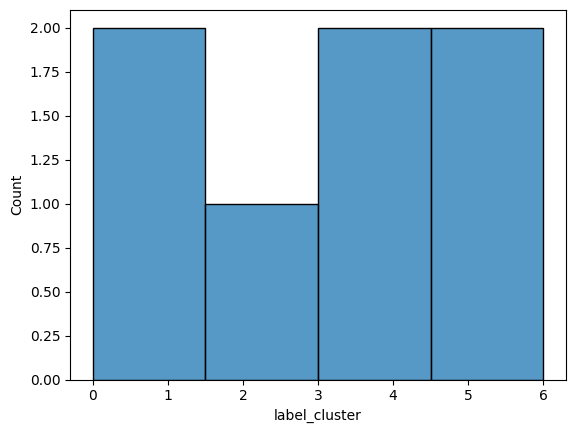

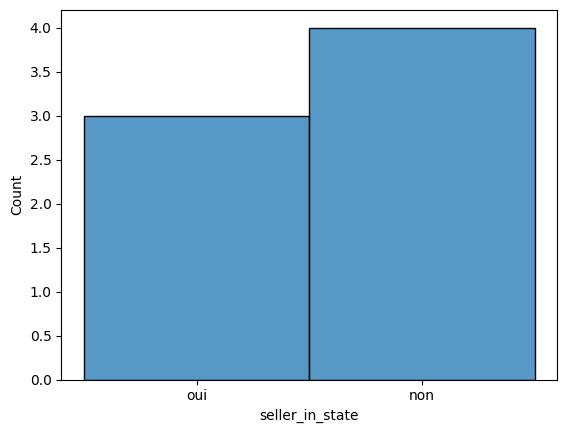

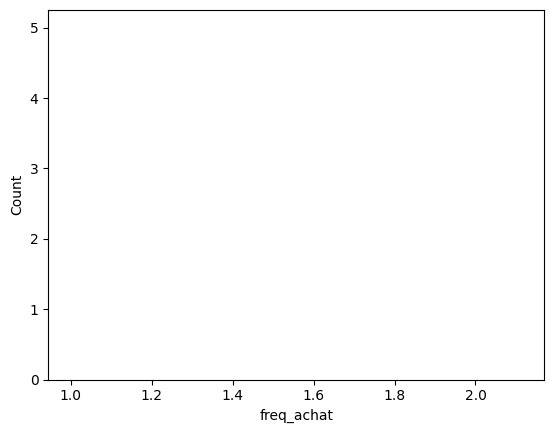

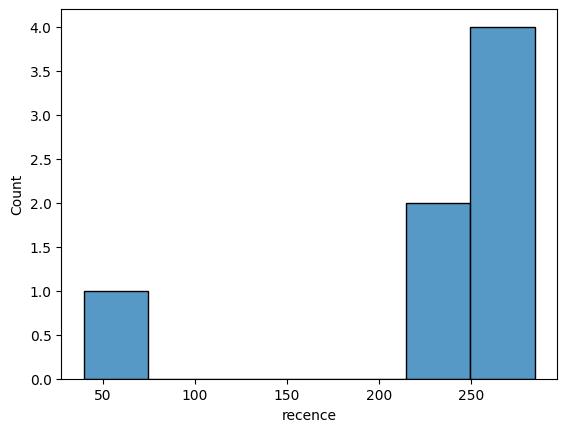

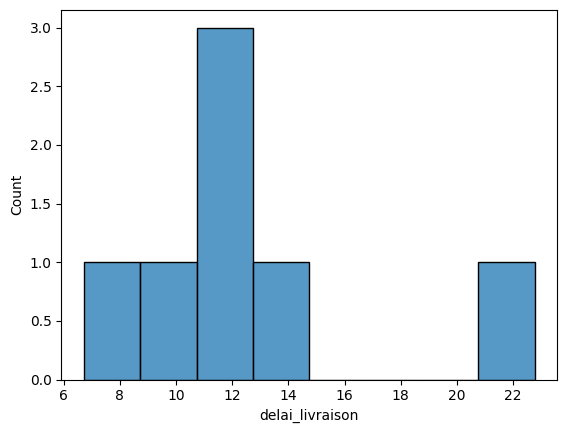

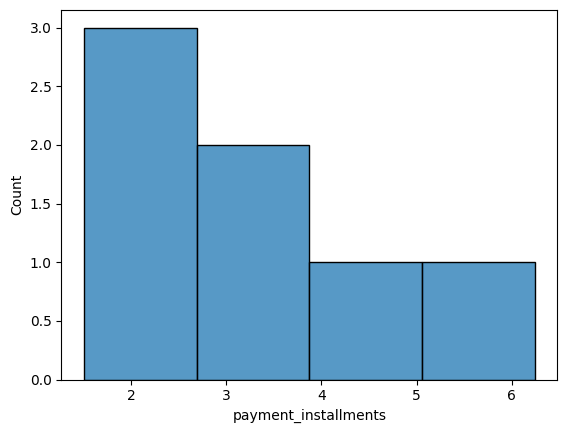

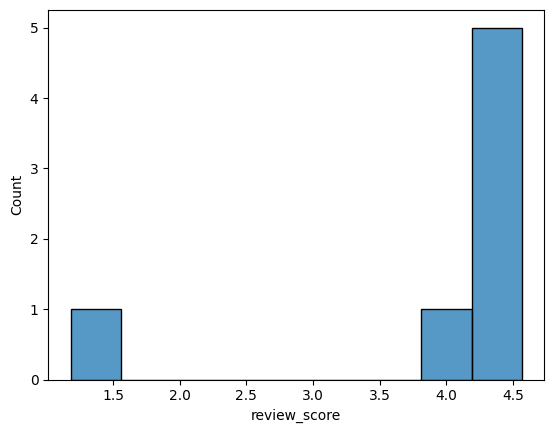

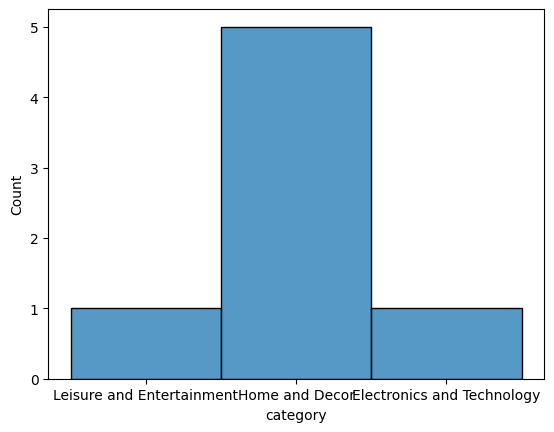

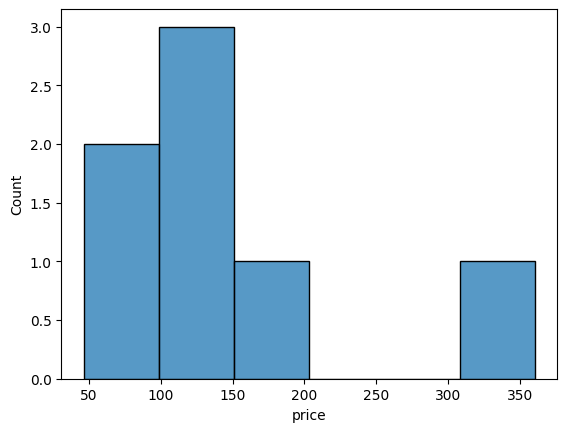

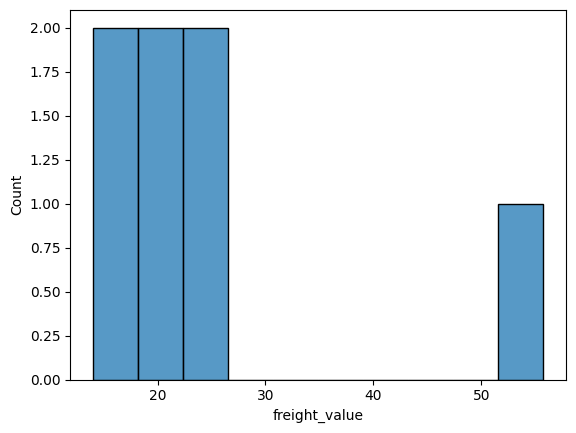

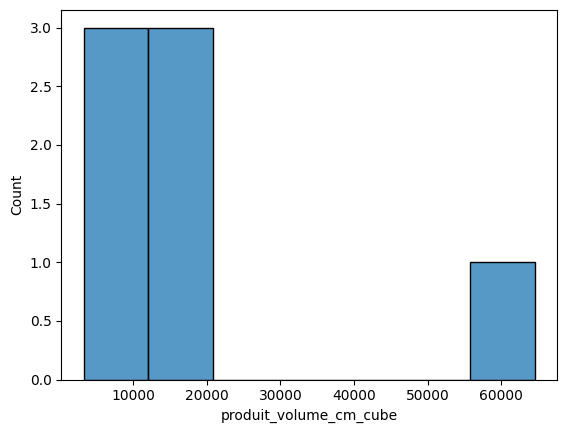

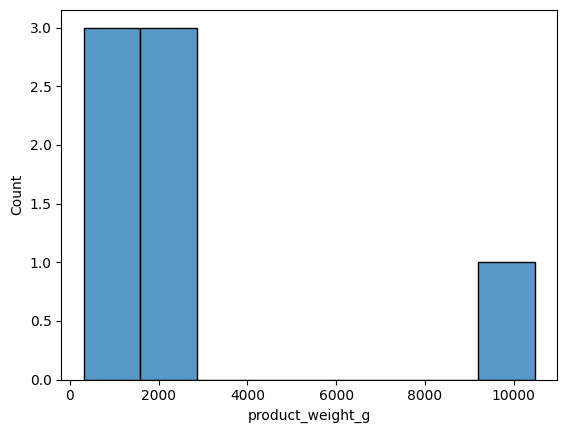

In [22]:
for col in df_expli.columns:
    sns.histplot(df_expli[col])
    plt.show()

# visulisation des cluster par k-mean

## prepossing

In [23]:
df

,freq_achat,delais_respecter,seller_in_state,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g,label_cluster
0,1,oui,non,SP,111.0,6.0,8.0,5.0,Home and Decor,129.90,12.00,7616.0,1500.0,0
1,1,oui,non,SP,114.0,3.0,1.0,4.0,Health and Beauty,18.90,8.29,5148.0,375.0,4
2,1,oui,oui,SC,537.0,26.0,8.0,3.0,Leisure and Entertainment,69.00,17.22,43750.0,1500.0,0
3,1,oui,oui,PA,321.0,20.0,4.0,4.0,Electronics and Technology,25.99,17.63,1045.0,150.0,4
4,1,oui,non,SP,288.0,13.0,6.0,5.0,Electronics and Technology,180.00,16.89,528.0,6050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,1,oui,oui,PE,447.0,28.0,10.0,5.0,Health and Beauty,1570.00,497.42,503250.0,60000.0,6
93354,1,oui,oui,BA,262.0,30.0,1.0,4.0,Health and Beauty,64.89,19.69,32076.0,1720.0,5
93355,1,oui,non,MT,568.0,15.0,1.0,5.0,Electronics and Technology,89.90,22.56,3315.0,600.0,5
93356,1,oui,oui,ES,119.0,12.0,5.0,5.0,Leisure and Entertainment,115.00,18.69,4480.0,444.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   freq_achat              93358 non-null  int64  
 1   delais_respecter        93358 non-null  object 
 2   seller_in_state         93358 non-null  object 
 3   customer_state          93358 non-null  object 
 4   recence                 93358 non-null  float64
 5   delai_livraison         93358 non-null  float64
 6   payment_installments    93358 non-null  float64
 7   review_score            93358 non-null  float64
 8   category                93358 non-null  object 
 9   price                   93358 non-null  float64
 10  freight_value           93358 non-null  float64
 11  produit_volume_cm_cube  93358 non-null  float64
 12  product_weight_g        93358 non-null  float64
 13  label_cluster           93358 non-null  uint16 
dtypes: float64(8), int64(1), object(4), ui

In [25]:
quantitative_col = list(df.select_dtypes(include=[float,int]).columns)

categoriel_col = list(df.select_dtypes(include=[object]).columns)

quantitative_pipeline = make_pipeline(FunctionTransformer(func=np.log1p),
                                      StandardScaler())
categoriel_pipeline = make_pipeline(OneHotEncoder(drop='if_binary',sparse=False))


preprocessing=ColumnTransformer([("one_hot",categoriel_pipeline,cat_cols),("scaling",quantitative_pipeline,num_cols)])

In [26]:
data_pca = preprocessing.fit_transform(df)

/Users/leonzhang/Desktop/olist_nonsupervise/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## pca


In [28]:
pca = PCA(n_components=0.99)
pipe_pca= make_pipeline(preprocessing,PCA(n_components=0.99))
df_pca = pca.fit_transform(data_pca)


In [29]:
df

,freq_achat,delais_respecter,seller_in_state,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g,label_cluster
0,1,oui,non,SP,111.0,6.0,8.0,5.0,Home and Decor,129.90,12.00,7616.0,1500.0,0
1,1,oui,non,SP,114.0,3.0,1.0,4.0,Health and Beauty,18.90,8.29,5148.0,375.0,4
2,1,oui,oui,SC,537.0,26.0,8.0,3.0,Leisure and Entertainment,69.00,17.22,43750.0,1500.0,0
3,1,oui,oui,PA,321.0,20.0,4.0,4.0,Electronics and Technology,25.99,17.63,1045.0,150.0,4
4,1,oui,non,SP,288.0,13.0,6.0,5.0,Electronics and Technology,180.00,16.89,528.0,6050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,1,oui,oui,PE,447.0,28.0,10.0,5.0,Health and Beauty,1570.00,497.42,503250.0,60000.0,6
93354,1,oui,oui,BA,262.0,30.0,1.0,4.0,Health and Beauty,64.89,19.69,32076.0,1720.0,5
93355,1,oui,non,MT,568.0,15.0,1.0,5.0,Electronics and Technology,89.90,22.56,3315.0,600.0,5
93356,1,oui,oui,ES,119.0,12.0,5.0,5.0,Leisure and Entertainment,115.00,18.69,4480.0,444.0,0


In [34]:
df_kmean = pd.DataFrame(df_pca)

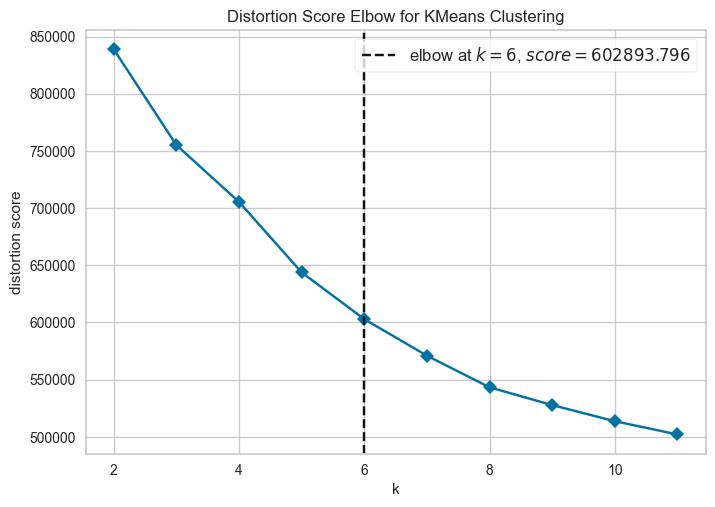

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:

visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(df_kmean) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

/Users/leonzhang/Desktop/olist_nonsupervise/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leonzhang/Desktop/olist_nonsupervise/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leonzhang/Desktop/olist_nonsupervise/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leonzhang/Desktop/olist_nonsupervise/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

KElbowVisualizer(ax=<AxesSubplot: >,
                 estimator=KMeans(n_clusters=11, random_state=42), k=(2, 12))

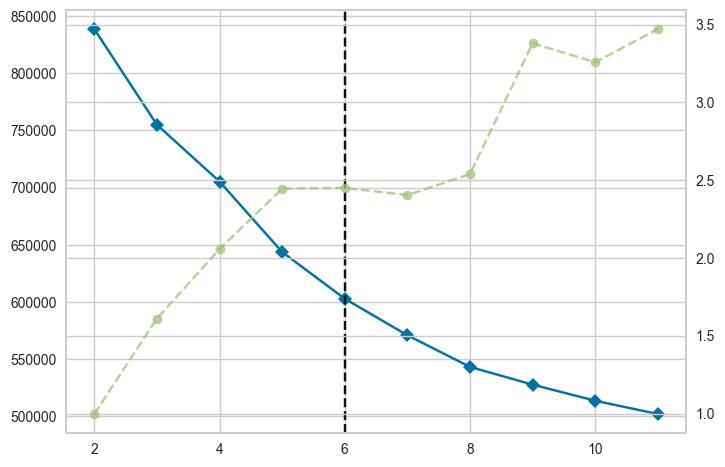

In [39]:
# km = KMeans(random_state=42)
# kpro = KPrototypes(n_clusters=7, init='Huang', random_state=42, max_iter=5, n_init=10, n_jobs=-2, gamma=.25)
# visualizer = KElbowVisualizer(km, k=(2,12))
# visualizer.fit(df_kmean)


In [54]:
df_kmean = pd.DataFrame(df_pca)
df_kmean

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.278898,-1.565300,0.044111,0.963037,-1.067050,0.686554,-0.715943,0.518124,-0.379044,0.606068,...,0.022887,-0.028717,-0.019598,-0.004007,0.009441,-0.006755,-0.000706,0.002187,-0.000012,0.009646
1,-2.461907,-1.216588,-0.164575,-0.599819,0.558894,0.880092,-0.498252,-0.294900,0.044562,-0.211515,...,-0.072211,-0.034129,0.050350,0.016941,-0.040579,0.003578,-0.004520,-0.011635,0.003194,0.014918
2,1.599312,1.394752,0.572996,0.018932,-1.128357,0.618396,-1.313334,0.640264,0.592964,-1.025770,...,-0.020990,0.056663,-0.274113,0.818604,0.038752,-0.334141,-0.333258,0.050227,-0.012833,-0.041669
3,-1.528361,1.786800,0.225949,0.708773,-1.031713,-0.719053,-0.736521,-0.419341,-0.316437,0.046882,...,0.028208,-0.078308,-0.153323,0.013487,-0.017387,-0.080393,0.083472,-0.006084,0.005073,0.036048
4,0.319410,-0.118678,0.395510,0.877445,-1.573819,-0.004093,0.550755,0.307182,-1.164178,0.959576,...,-0.114441,-0.086515,-0.138043,-0.058366,-0.057861,-0.066931,-0.051920,0.026937,-0.002268,-0.022595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,7.995860,0.120913,0.023781,-0.174323,-0.702887,-1.954651,0.337567,-1.700803,-1.072236,-0.706672,...,-0.167273,-0.072319,-0.016607,-0.020231,-0.210915,-0.158307,0.091983,-0.027800,0.002749,0.834068
93354,0.817025,1.220224,0.080958,-1.293063,0.510948,-0.675482,-0.374088,0.849669,0.213099,-0.214718,...,-0.064523,-0.150473,-0.288369,0.160468,-0.204172,0.840493,-0.154793,0.018362,-0.013549,-0.027427
93355,-0.438869,0.842480,0.627708,-0.896283,-0.488481,-0.749575,0.838073,-0.296967,-0.611387,0.180154,...,-0.069930,0.202120,-0.086302,0.168187,-0.027014,0.140609,0.299386,-0.041643,0.012421,0.065540
93356,-0.004106,-0.033410,-0.182073,1.047082,-0.910507,-0.745501,-0.120131,0.277565,0.525908,-0.526230,...,0.033930,-0.079387,-0.027238,0.077146,-0.006448,-0.095450,0.401353,-0.583696,-0.603150,-0.195448


In [ ]:
df_kmean = pd.DataFrame(df_pca)
df_kmean['label_cluster']=clusters
df_kmean

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,label_cluster
0,0.278898,-1.565300,0.044111,0.963037,-1.067050,0.686554,-0.715943,0.518124,-0.379044,0.606068,...,-0.028717,-0.019598,-0.004007,0.009441,-0.006755,-0.000706,0.002187,-0.000012,0.009646,0
1,-2.461907,-1.216588,-0.164575,-0.599819,0.558894,0.880092,-0.498252,-0.294900,0.044562,-0.211515,...,-0.034129,0.050350,0.016941,-0.040579,0.003578,-0.004520,-0.011635,0.003194,0.014918,4
2,1.599312,1.394752,0.572996,0.018932,-1.128357,0.618396,-1.313334,0.640264,0.592964,-1.025770,...,0.056663,-0.274113,0.818604,0.038752,-0.334141,-0.333258,0.050227,-0.012833,-0.041669,0
3,-1.528361,1.786800,0.225949,0.708773,-1.031713,-0.719053,-0.736521,-0.419341,-0.316437,0.046882,...,-0.078308,-0.153323,0.013487,-0.017387,-0.080393,0.083472,-0.006084,0.005073,0.036048,4
4,0.319410,-0.118678,0.395510,0.877445,-1.573819,-0.004093,0.550755,0.307182,-1.164178,0.959576,...,-0.086515,-0.138043,-0.058366,-0.057861,-0.066931,-0.051920,0.026937,-0.002268,-0.022595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,7.995860,0.120913,0.023781,-0.174323,-0.702887,-1.954651,0.337567,-1.700803,-1.072236,-0.706672,...,-0.072319,-0.016607,-0.020231,-0.210915,-0.158307,0.091983,-0.027800,0.002749,0.834068,6
93354,0.817025,1.220224,0.080958,-1.293063,0.510948,-0.675482,-0.374088,0.849669,0.213099,-0.214718,...,-0.150473,-0.288369,0.160468,-0.204172,0.840493,-0.154793,0.018362,-0.013549,-0.027427,5
93355,-0.438869,0.842480,0.627708,-0.896283,-0.488481,-0.749575,0.838073,-0.296967,-0.611387,0.180154,...,0.202120,-0.086302,0.168187,-0.027014,0.140609,0.299386,-0.041643,0.012421,0.065540,5
93356,-0.004106,-0.033410,-0.182073,1.047082,-0.910507,-0.745501,-0.120131,0.277565,0.525908,-0.526230,...,-0.079387,-0.027238,0.077146,-0.006448,-0.095450,0.401353,-0.583696,-0.603150,-0.195448,0


<AxesSubplot: xlabel='0', ylabel='1'>

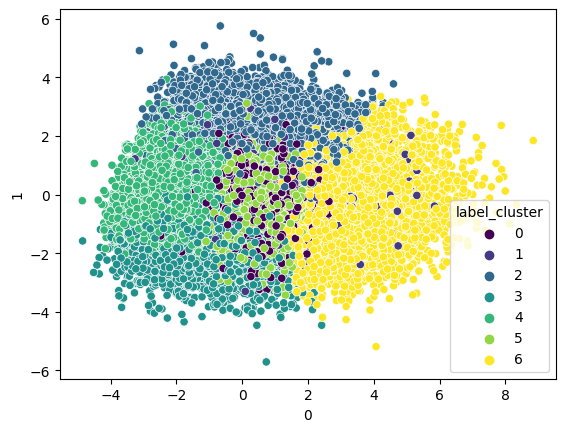

In [ ]:
sns.scatterplot(data=df_kmean,x=df_kmean.iloc[:,0],y=df_kmean.iloc[:,1],hue=df_kmean.label_cluster,palette='viridis')